In [1]:
import os
from faceid_dataset import FaceIDDataset
from torch.utils.data import DataLoader
from faceid_model import FaceID_Model
from faceid_utils import display

In [2]:
data_dir = '/raid/data/pytorch_dataset/faceid/'
dataset = FaceIDDataset(data_dir, train=False)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

In [3]:
faceid_model = FaceID_Model(pretrained=True)

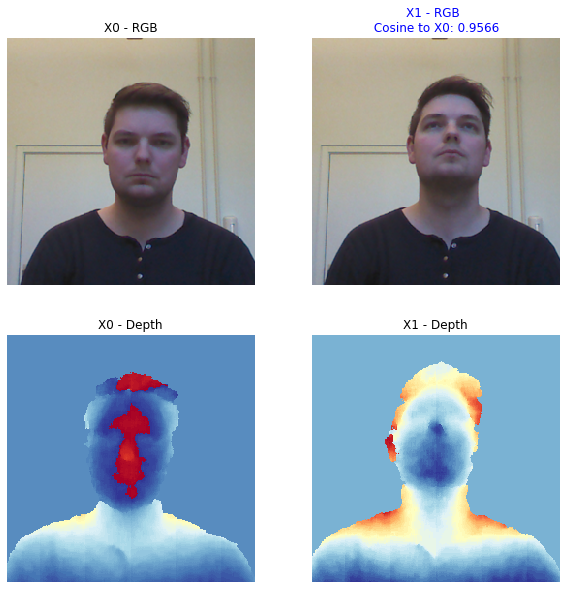

In [24]:
x0, x1, y = next(iter(dataloader))
display(faceid_model, x0, x1)

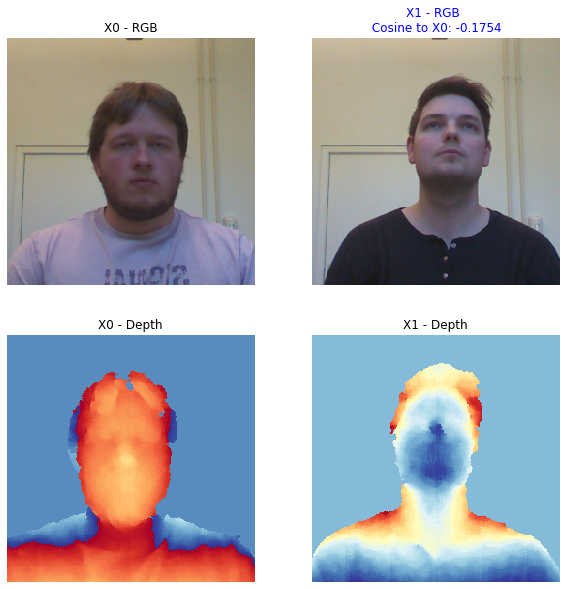

In [26]:
x0, x1, _ = next(iter(dataloader))
display(faceid_model, x0, x1)

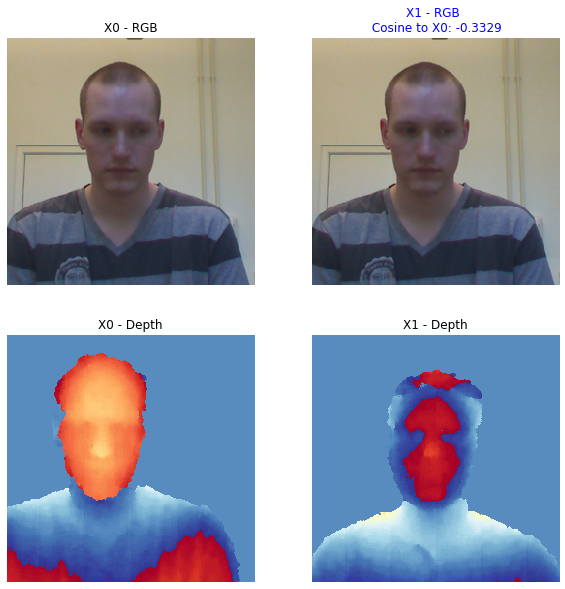

In [27]:
x0, x1, _ = next(iter(dataloader))
display(faceid_model, x0, x1)